In [52]:
# import all packages and libraries here.
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn import metrics, svm, linear_model , model_selection, preprocessing, pipeline, impute, compose,decomposition,ensemble
from sklearn.manifold import TSNE, MDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2,mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Load Data

In [6]:
mnist = fetch_openml('mnist_784', as_frame=False,cache=True)

In [7]:
_X_train, _y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [8]:
offset :int = 1000  # max value is 60_000
_n_components = 0.95
X_train ,y_train = _X_train[:offset],_y_train[:offset]  # data already shuffled 

# Q1

## Train RandomForrest

In [19]:
rf_model = ensemble.RandomForestClassifier()

In [6]:
%timeit -r 1 -n 1 rf_model.fit(X_train,y_train)

321 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
%%timeit -r 1 -n 1 
print(metrics.classification_report(y_test,rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       980
           1       0.95      0.98      0.97      1135
           2       0.89      0.88      0.89      1032
           3       0.93      0.81      0.86      1010
           4       0.83      0.87      0.85       982
           5       0.81      0.82      0.82       892
           6       0.90      0.88      0.89       958
           7       0.89      0.91      0.90      1028
           8       0.90      0.81      0.85       974
           9       0.79      0.88      0.83      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

246 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%timeit -r 1 -n 1  model_selection.cross_val_score(rf_model, X_train, y_train,cv=3, n_jobs=-1)

909 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## PCA

In [9]:
pca = decomposition.PCA(n_components=_n_components,random_state=42,)

In [10]:
%timeit -r 1 -n 1  pca.fit(X_train)

233 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [11]:
X_train_transfrom2 = pca.transform(X_train)

In [12]:
clf = make_pipeline(PCA(n_components=_n_components,random_state=42), RandomForestClassifier(random_state=42))
param_distrib = {
"pca__n_components": [_n_components, 0.90],
"randomforestclassifier__n_estimators": np.arange(50, 500)
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca',
                                              PCA(n_components=0.95,
                                                  random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'pca__n_components': [0.95, 0.9],
                                        'randomforestclassifier__n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  7...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [13]:
print(metrics.classification_report(y_test,rnd_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       980
           1       0.94      0.98      0.96      1135
           2       0.89      0.86      0.88      1032
           3       0.90      0.83      0.86      1010
           4       0.80      0.84      0.82       982
           5       0.82      0.75      0.78       892
           6       0.87      0.88      0.87       958
           7       0.88      0.88      0.88      1028
           8       0.83      0.79      0.81       974
           9       0.77      0.81      0.79      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## SGDClassifier

In [15]:
sgd_model = linear_model.SGDClassifier( n_jobs=-1)
sgd_model.fit(X_train, y_train)
print(metrics.classification_report(y_test,sgd_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       980
           1       0.95      0.93      0.94      1135
           2       0.82      0.87      0.84      1032
           3       0.88      0.68      0.77      1010
           4       0.89      0.76      0.82       982
           5       0.64      0.75      0.69       892
           6       0.87      0.88      0.87       958
           7       0.88      0.86      0.87      1028
           8       0.68      0.77      0.72       974
           9       0.72      0.79      0.76      1009

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.83     10000



In [16]:
, n_jobs=-1pca = decomposition.PCA(n_components=_n_components,random_state=42)
pca.fit(X_train)
X_train_transfrom2 = pca.transform(X_train)
clf = make_pipeline(PCA(n_components=_n_components,random_state=42), linear_model.SGDClassifier(random_state=42))


In [17]:
clf.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=0.95, random_state=42)),
  ('sgdclassifier', SGDClassifier(random_state=42))],
 'verbose': False,
 'pca': PCA(n_components=0.95, random_state=42),
 'sgdclassifier': SGDClassifier(random_state=42),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 0.95,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__average': False,
 'sgdclassifier__class_weight': None,
 'sgdclassifier__early_stopping': False,
 'sgdclassifier__epsilon': 0.1,
 'sgdclassifier__eta0': 0.0,
 'sgdclassifier__fit_intercept': True,
 'sgdclassifier__l1_ratio': 0.15,
 'sgdclassifier__learning_rate': 'optimal',
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__max_iter': 1000,
 'sgdclassifier__n_iter_no_change': 5,
 'sgdclassifier__n_jobs': None,
 'sgdclassifier__penalty': 'l2',
 'sgdclas

In [18]:
param_distrib = {
"pca__n_components": [_n_components, 0.90],
"sgdclassifier__alpha": np.arange(0.0001, 0.0005,0.0001)
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=8, cv=3, random_state=42)
rnd_search.fit(X_train, y_train)
print(metrics.classification_report(y_test,rnd_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       980
           1       0.63      0.96      0.76      1135
           2       0.74      0.64      0.69      1032
           3       0.76      0.45      0.57      1010
           4       0.51      0.75      0.61       982
           5       0.48      0.61      0.54       892
           6       0.55      0.66      0.60       958
           7       0.69      0.81      0.75      1028
           8       0.61      0.36      0.45       974
           9       0.67      0.15      0.25      1009

    accuracy                           0.63     10000
   macro avg       0.64      0.62      0.60     10000
weighted avg       0.64      0.63      0.60     10000



<div style='text-align:left; color:red; font-size:20px'>
    <p>
        با مقایسه این دو حالت بهبودی با روش دوم مشاهده نشد
    </p>
    <p>
        PCA & SGD not helped 
    </p>
</div>


# Q2

In [9]:
# Set X and y
X = mnist.data.astype('float64')[:5000]
y = mnist.target.astype(int)[:5000]

# Apply t-SNE to reduce the dimensionality to 2
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# PCA to reduce the dimensionality to 2
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Apply LLE to reduce the dimensionality to 2
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_lle = lle.fit_transform(X_std)


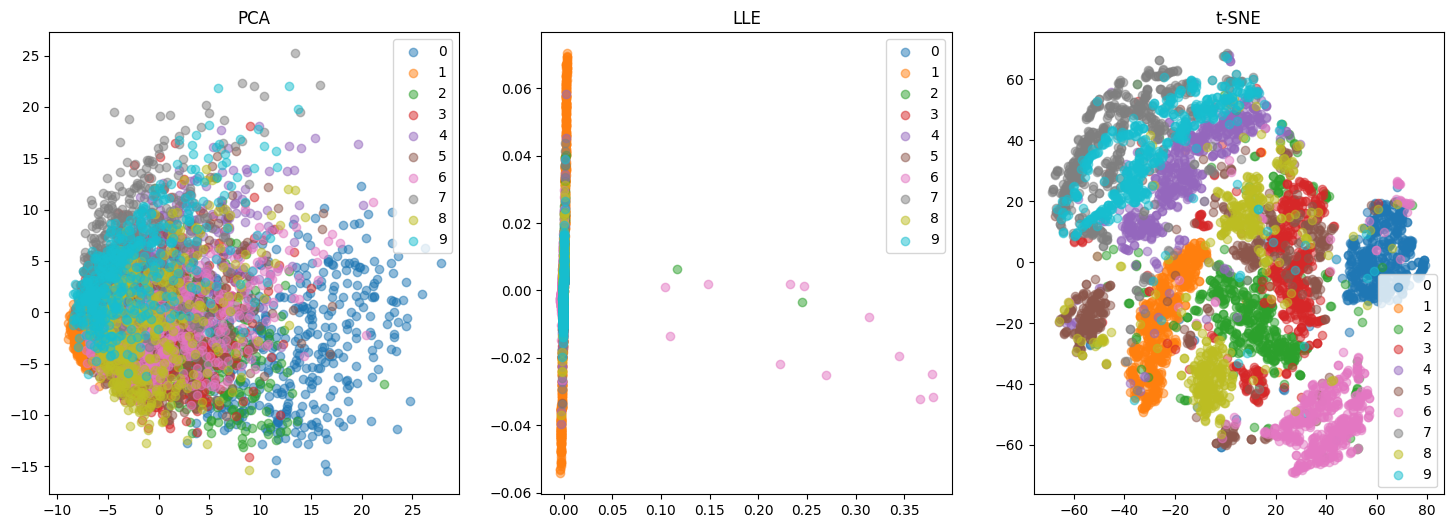

In [15]:
plt.figure(figsize=(18, 6))

plt.subplot(131)
for i in range(10):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=str(i), alpha=0.5)
plt.title('PCA')
plt.legend()

plt.subplot(132)
for i in range(10):
    plt.scatter(X_lle[y == i, 0], X_lle[y == i, 1], label=str(i), alpha=0.5)
plt.title('LLE')
plt.legend()

plt.subplot(133)
for i in range(10):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=str(i), alpha=0.5)
plt.title('t-SNE')
plt.legend()

plt.show()

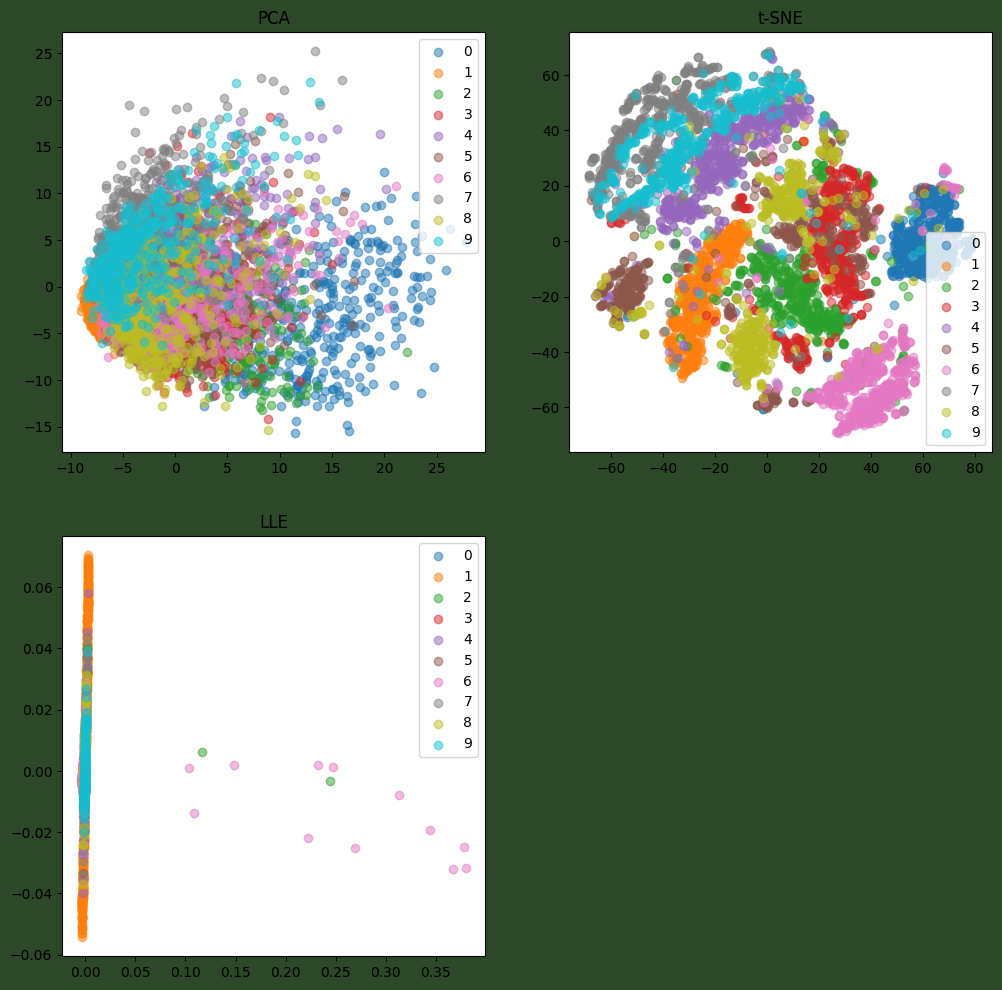

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12),)
fig.set_facecolor('#2d4729')

# Plot PCA
for i in range(10):
    axs[0, 0].scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=str(i), alpha=0.5)
axs[0, 0].set_title('PCA')
axs[0, 0].legend()

# Plot t-SNE
for i in range(10):
    axs[0, 1].scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=str(i), alpha=0.5)
axs[0, 1].set_title('t-SNE')
axs[0, 1].legend()

# Plot LLE
for i in range(10):
    axs[1, 0].scatter(X_lle[y == i, 0], X_lle[y == i, 1], label=str(i), alpha=0.5)
axs[1, 0].set_title('LLE')
axs[1, 0].legend()

# Merge the last two subplots
axs[1, 1].axis('off')
axs[1, 1].text(0.5, 0.5, '', ha='center', va='center', fontsize=14, color='gray')

plt.show()

In [ ]:

# # Standardize the data
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

# # Apply MDS to reduce the dimensionality to 2
# mds = MDS(n_components=1, random_state=42,n_jobs=-4)
# X_mds = mds.fit_transform(X_std)

# # Plot the result using Matplotlib
# plt.figure(figsize=(8, 6))
# for i in range(10):
#     plt.scatter(X_mds[y == i, 0], X_mds[y == i, 1], label=str(i), alpha=0.5)
# plt.title('MDS')
# plt.legend()
# plt.show()

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


# Q3

In [39]:
data = pd.read_csv('../../../datasets/train.csv')
data.TARGET.nunique()

2

In [54]:
X = data.drop('TARGET', axis=1)  # Features
y = data['TARGET']  # Target variable

# Step 1: 
vt = VarianceThreshold(threshold=0.2,)
X_vt = vt.fit_transform(X)

In [55]:
# Step 2: 
X_train, X_test, y_train, y_test = train_test_split(X_vt, y, test_size=0.2, random_state=42)
skb = SelectKBest(score_func=mutual_info_classif, k=10) 
X_filter = skb.fit_transform(X_train, y_train)

In [57]:
# Step 3: 
clf = RandomForestClassifier()  
clf.fit(X_filter, y_train)
y_predict = clf.predict(skb.transform(X_test))
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14597
           1       0.06      0.01      0.01       607

    accuracy                           0.95     15204
   macro avg       0.51      0.50      0.50     15204
weighted avg       0.92      0.95      0.94     15204



In [61]:
X_vt 


array([[1.00000000e+00, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 3.92051700e+04],
       [3.00000000e+00, 2.00000000e+00, 3.40000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 4.92780300e+04],
       [4.00000000e+00, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 6.73337700e+04],
       ...,
       [1.51835000e+05, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 7.40281500e+04],
       [1.51836000e+05, 2.00000000e+00, 2.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 8.42781600e+04],
       [1.51838000e+05, 2.00000000e+00, 4.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05]])

In [62]:
X_filter

array([[1.000000e+00, 1.000000e+00, 3.000000e+00, ..., 3.000000e+00,
        3.000000e+00, 3.000000e+00],
       [0.000000e+00, 1.000000e+00, 3.000000e+00, ..., 1.500000e+05,
        0.000000e+00, 2.000000e+00],
       [0.000000e+00, 0.000000e+00, 3.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.000000e+00, 1.000000e+00, 3.000000e+00, ..., 3.000000e+00,
        3.000000e+00, 3.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 3.601269e+04,
        3.601269e+04, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 3.000000e+00, ..., 3.000000e+00,
        3.000000e+00, 3.000000e+00]])